In [7]:
import pandas as pd
import csv
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [8]:
def get_data(path): 
 list_row=[]
 date=[]
 traffic=[]
 with open(path,'r') as file:
  reader = csv.reader(file)
  for row in reader:
    if row[0]!='Date':
     traffic.append(row[1])
     date.append(row[0])     
     list_row.append(row)
 #print(date)
 #print(traffic)
 #print(len(traffic))
 return list_row,date,traffic

In [9]:
def calendar(date):
 d1=[]
 m1=[]
 y1=[]
 for i in date:
   a = i.split('/')
   if a[0] not in d1:
     d1.append(a[0])
   if a[1] not in m1:
     m1.append(a[1])
   if a[2] not in y1:
     y1.append(a[2])
 m2={'1':31,'2':28,'3':31,'4':30,'5':31,'6':30,'7':31,'8':31,'9':30,'10':31,'11':30,'12':31}
 date=[]
 for i in y1:
   for j in m2:
     len = m2[j]
     if (int(i)%4)==0 and j=='2':
       len=29
     for k in range(1,len+1):
       temp = str(k)+'/'+j+'/'+i
       date.append(temp)
 return date,y1,m1,d1

In [10]:
def holiday_calendar():
 holiday=[]
 for i in year_all:
  a = "/15/8/" +i
  holiday.append(a)
  b = '26/1/'+i
  holiday.append(b) 
  b = '14/11/'+i
  holiday.append(b)
  b = '26/10/'+i
  holiday.append(b)
  b = '1/1/'+i
  holiday.append(b)
  b = '3/3/'+i
  holiday.append(b)
  b = '31/12/'+i
  holiday.append(b)
 return holiday

In [11]:
def date_to_day(list_row):
 week=['mon','tues','wed','thur','fri','sat','sun']
 count=3
 day={}
 for i in date:
   if count==7:
     count=0
   day[i]=week[count]
   count=count+1
 for row in list_row:
   if row[0] in holiday:
     row.append(1)
   else:
     row.append(0)
   row.append(day[row[0]])
 return day,list_row,week

In [12]:
def to_graph():
 listt=[]
 listd=[]
 for i in list_row:
    listt.append(int(i[1]))
    listd.append(i[0])
    ticks =  [0,365,365*2,365*3,365*4]
    labels = ['1/1/2015','1/1/2016','1/1/2017','1/1/2018','1/1/2019']
 return listt,listd,ticks,labels

In [13]:
def max(list1):
  maximus=0
  for i in list1:
    if int(i)>maximus:
      maximus=int(i)
  return maximus

In [14]:
def pre_process(max,list_row):
 for i in range(0,len(list_row)):
   list_row[i][1] = int(list_row[i][1])/max
 return list_row

In [15]:
def number_to_one_hot(list1):
  listi=[]
  for i in range(0,len(list1)):
    listi.append(i)
  one_hot = keras.utils.to_categorical(listi)
  dictf={}
  count=0
  for i in listi:
    code = one_hot[i]
    ind = list1[count]
    dictf[ind] = code
    count = count+1
  return dictf

In [16]:
#Defining Seasonality
season=['winter','summer','autumn','spring','rainy']
def cur_season(season,date):
  sess= number_to_one_hot(season)
  d = date.split('/')
  w = ['11','12','1']
  a=0
  s = ['5','6','7','8']
  sp = ['2','3','4']
  aut = ['10']
  ra = ['9']
  if d[1] in w:
    a= sess['winter']
  if d[1] in s:
    a= sess['summer']
  if d[1] in sp:
    a= sess['spring']
  if d[1] in aut:
    a= sess['autumn']
  if d[1] in ra:
    a= sess['rainy']
  return a

In [17]:
#Encoding Dates
def date_enc(date):
  days=[]
  months=[]
  years=[]
  final={}
  count=0
  for i in date:
    datess = i.split("/")
    if int(datess[0]) not in days:
      days.append(int(datess[0]))
    if int(datess[1]) not in months:
      months.append(int(datess[1]))
    if int(datess[2]) not in years:
      years.append(int(datess[2]))
  day_enc = number_to_one_hot(days)
  month_enc = number_to_one_hot(months)
  count=0
  years_enc = number_to_one_hot(years)
  count=0
  return day_enc,month_enc,years_enc

In [18]:
def date_to_enc(date,days,months,years):
  dates = date.split("/")
  day = days[int(dates[0])]
  month = months[int(dates[1])]
  year = years[int(dates[2])]
  return day,month,year

In [51]:
list_row,date,traffic = get_data('/home/abh/Documents/Python/Untitled Folder/submission (1).csv')
print(date)
print(traffic)

['1/1/2015', '2/1/2015', '3/1/2015', '4/1/2015', '5/1/2015', '6/1/2015', '7/1/2015', '8/1/2015', '9/1/2015', '10/1/2015', '11/1/2015', '12/1/2015', '13/1/2015', '14/1/2015', '15/1/2015', '16/1/2015', '17/1/2015', '18/1/2015', '19/1/2015', '20/1/2015', '21/1/2015', '22/1/2015', '23/1/2015', '24/1/2015', '25/1/2015', '26/1/2015', '27/1/2015', '28/1/2015', '29/1/2015', '30/1/2015', '31/1/2015', '1/2/2015', '2/2/2015', '3/2/2015', '4/2/2015', '5/2/2015', '6/2/2015', '7/2/2015', '8/2/2015', '9/2/2015', '10/2/2015', '11/2/2015', '12/2/2015', '13/2/2015', '14/2/2015', '15/2/2015', '16/2/2015', '17/2/2015', '18/2/2015', '19/2/2015', '20/2/2015', '21/2/2015', '22/2/2015', '23/2/2015', '24/2/2015', '25/2/2015', '26/2/2015', '27/2/2015', '28/2/2015', '1/3/2015', '2/3/2015', '3/3/2015', '4/3/2015', '5/3/2015', '6/3/2015', '7/3/2015', '8/3/2015', '9/3/2015', '10/3/2015', '11/3/2015', '12/3/2015', '13/3/2015', '14/3/2015', '15/3/2015', '16/3/2015', '17/3/2015', '18/3/2015', '19/3/2015', '20/3/2015',

In [58]:
list_test = list_row[1460:]
list_train = list_row[:1460]

In [96]:
test_sales=[]
for i in list_test:
    test_sales.append(int(i[1]))

In [59]:
date,year_all,month_all,date_all = calendar(date)
print(date)
print(year_all)
print(month_all)
print(date_all)

['1/1/2015', '2/1/2015', '3/1/2015', '4/1/2015', '5/1/2015', '6/1/2015', '7/1/2015', '8/1/2015', '9/1/2015', '10/1/2015', '11/1/2015', '12/1/2015', '13/1/2015', '14/1/2015', '15/1/2015', '16/1/2015', '17/1/2015', '18/1/2015', '19/1/2015', '20/1/2015', '21/1/2015', '22/1/2015', '23/1/2015', '24/1/2015', '25/1/2015', '26/1/2015', '27/1/2015', '28/1/2015', '29/1/2015', '30/1/2015', '31/1/2015', '1/2/2015', '2/2/2015', '3/2/2015', '4/2/2015', '5/2/2015', '6/2/2015', '7/2/2015', '8/2/2015', '9/2/2015', '10/2/2015', '11/2/2015', '12/2/2015', '13/2/2015', '14/2/2015', '15/2/2015', '16/2/2015', '17/2/2015', '18/2/2015', '19/2/2015', '20/2/2015', '21/2/2015', '22/2/2015', '23/2/2015', '24/2/2015', '25/2/2015', '26/2/2015', '27/2/2015', '28/2/2015', '1/3/2015', '2/3/2015', '3/3/2015', '4/3/2015', '5/3/2015', '6/3/2015', '7/3/2015', '8/3/2015', '9/3/2015', '10/3/2015', '11/3/2015', '12/3/2015', '13/3/2015', '14/3/2015', '15/3/2015', '16/3/2015', '17/3/2015', '18/3/2015', '19/3/2015', '20/3/2015',

In [60]:
holiday = holiday_calendar()
print(holiday)

['/15/8/2015', '26/1/2015', '14/11/2015', '26/10/2015', '1/1/2015', '3/3/2015', '31/12/2015', '/15/8/2016', '26/1/2016', '14/11/2016', '26/10/2016', '1/1/2016', '3/3/2016', '31/12/2016', '/15/8/2017', '26/1/2017', '14/11/2017', '26/10/2017', '1/1/2017', '3/3/2017', '31/12/2017', '/15/8/2018', '26/1/2018', '14/11/2018', '26/10/2018', '1/1/2018', '3/3/2018', '31/12/2018', '/15/8/2019', '26/1/2019', '14/11/2019', '26/10/2019', '1/1/2019', '3/3/2019', '31/12/2019']


In [61]:
day,list_row,week = date_to_day(list_row)

In [62]:
print(day)
print(list_row[0:10])

{'1/1/2015': 'thur', '2/1/2015': 'fri', '3/1/2015': 'sat', '4/1/2015': 'sun', '5/1/2015': 'mon', '6/1/2015': 'tues', '7/1/2015': 'wed', '8/1/2015': 'thur', '9/1/2015': 'fri', '10/1/2015': 'sat', '11/1/2015': 'sun', '12/1/2015': 'mon', '13/1/2015': 'tues', '14/1/2015': 'wed', '15/1/2015': 'thur', '16/1/2015': 'fri', '17/1/2015': 'sat', '18/1/2015': 'sun', '19/1/2015': 'mon', '20/1/2015': 'tues', '21/1/2015': 'wed', '22/1/2015': 'thur', '23/1/2015': 'fri', '24/1/2015': 'sat', '25/1/2015': 'sun', '26/1/2015': 'mon', '27/1/2015': 'tues', '28/1/2015': 'wed', '29/1/2015': 'thur', '30/1/2015': 'fri', '31/1/2015': 'sat', '1/2/2015': 'sun', '2/2/2015': 'mon', '3/2/2015': 'tues', '4/2/2015': 'wed', '5/2/2015': 'thur', '6/2/2015': 'fri', '7/2/2015': 'sat', '8/2/2015': 'sun', '9/2/2015': 'mon', '10/2/2015': 'tues', '11/2/2015': 'wed', '12/2/2015': 'thur', '13/2/2015': 'fri', '14/2/2015': 'sat', '15/2/2015': 'sun', '16/2/2015': 'mon', '17/2/2015': 'tues', '18/2/2015': 'wed', '19/2/2015': 'thur', '2

In [64]:
listt,listd,ticks,labels = to_graph()

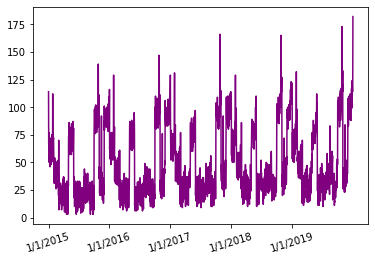

In [65]:
plt.plot(listd, listt,color='purple')
plt.xticks(ticks,labels,rotation=17)
plt.show()

In [66]:
max1= max(traffic)
print(max1)

182


In [67]:
list_train = pre_process(max1,list_train)
print(list_train[0:10])

[['1/1/2015', 0.6263736263736264, 1, 'thur'], ['2/1/2015', 0.3626373626373626, 0, 'fri'], ['3/1/2015', 0.4230769230769231, 0, 'sat'], ['4/1/2015', 0.29120879120879123, 0, 'sun'], ['5/1/2015', 0.27472527472527475, 0, 'mon'], ['6/1/2015', 0.34065934065934067, 0, 'tues'], ['7/1/2015', 0.3901098901098901, 0, 'wed'], ['8/1/2015', 0.26373626373626374, 0, 'thur'], ['9/1/2015', 0.2692307692307692, 0, 'fri'], ['10/1/2015', 0.25274725274725274, 0, 'sat']]


In [68]:
days,months,years = date_enc(date)
print(days)
print(months)
print(years)

{1: array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32), 2: array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32), 3: array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32), 4: array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32), 5: array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32), 6: array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32), 7: array([0., 0

In [69]:
#Converting Data into inputs

def conversion(week,days,months,years,list_row):
  inp_day = []
  inp_mon = []
  inp_year = []
  inp_week=[]
  inp_hol=[]
  out = []
  week1 = number_to_one_hot(week)
  count=0
  for row in list_row:
       d = row[0]
       d_split=d.split('/')
       if d_split[2]==str(year_all[0]):
         continue
       d1,m1,y1 = date_to_enc(d,days,months,years)
       inp_day.append(d1)
       inp_mon.append(m1)
       inp_year.append(y1)
       week2 = week1[row[3]]
       inp_week.append(week2)
       t1 = row[1]
       inp_hol.append([row[2]])
       out.append(t1)
       count = count+1
  return inp_day,inp_mon,inp_year,inp_week,inp_hol,out

In [71]:
inp_day,inp_mon,inp_year,inp_week,inp_hol,out = conversion(week,days,months,years,list_train)
inp_day = np.array(inp_day)
inp_mon = np.array(inp_mon)
inp_year = np.array(inp_year)
inp_week = np.array(inp_week)
inp_hol = np.array(inp_hol)
print(inp_day.shape)
print(inp_day.dtype)
print(inp_mon.shape)
print(inp_mon.dtype)
print(inp_year.shape)
print(inp_year.dtype)
print(inp_week.shape)
print(inp_week.dtype)
print(inp_hol.shape)
print(inp_hol.dtype)
out = np.array(out)
print(out.shape)
print(out.dtype)

(1095, 31)
float32
(1095, 12)
float32
(1095, 5)
float32
(1095, 7)
float32
(1095, 1)
int64
(1095,)
float64


In [74]:
def other_inputs(season,list_row):
 inp7=[]
 inp_prev=[]
 inp_sess=[]
 count=0
 for row in list_row:
  ind = count
  count=count+1
  d = row[0]
  d_split=d.split('/')
  if d_split[2]==str(year_all[0]):
    continue
  sess = cur_season(season,d)
  inp_sess.append(sess)
  t7=[]
  t_prev=[]
  t_prev.append(list_row[ind-365][1])
  for j in range(0,7):
       t7.append(list_row[ind-j-1][1])
  inp7.append(t7)
  inp_prev.append(t_prev)
 return inp7,inp_prev,inp_sess

In [75]:
inp7,inp_prev,inp_sess = other_inputs(season,list_train)
inp7 = np.array(inp7)
inp7= inp7.reshape(inp7.shape[0],inp7.shape[1],1)
print(inp7.shape)
inp_prev = np.array(inp_prev)
print(inp_prev.shape)
inp_sess = np.array(inp_sess)
print(inp_sess.shape)

(1095, 7, 1)
(1095, 1)
(1095, 5)


In [76]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense,LSTM,Flatten
from tensorflow.keras.layers import concatenate

input_day = Input(shape=(inp_day.shape[1],),name = 'input_day')
input_mon = Input(shape=(inp_mon.shape[1],),name = 'input_mon')
input_year = Input(shape=(inp_year.shape[1],),name = 'input_year')
input_week = Input(shape=(inp_week.shape[1],),name = 'input_week')
input_hol = Input(shape=(inp_hol.shape[1],),name = 'input_hol')
input_day7 = Input(shape=(inp7.shape[1],inp7.shape[2]),name = 'input_day7')
input_day_prev = Input(shape=(inp_prev.shape[1],),name = 'input_day_prev')
input_day_sess = Input(shape=(inp_sess.shape[1],),name = 'input_day_sess')

x1 = Dense(5, activation='relu')(input_day)
x2 = Dense(5, activation='relu')(input_mon)
x3 = Dense(5, activation='relu')(input_year)
x4 = Dense(5, activation='relu')(input_week)
x5 = Dense(5, activation='relu')(input_hol)
x_6 = Dense(5, activation='relu')(input_day7)
x__6 = LSTM(5,return_sequences=True)(x_6)
x6 = Flatten()(x__10)
x7 = Dense(5, activation='relu')(input_day_prev)
x8 = Dense(5, activation='relu')(input_day_sess)
c = concatenate([x1,x2,x3,x4,x5,x6,x7,x8])
layer1 = Dense(64,activation='relu')(c)
outputs = Dense(1, activation='sigmoid')(layer1)

model = Model(inputs=[input_day,input_mon,input_year,input_week,input_hol,input_day7,input_day_prev,input_day_sess], outputs=outputs)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_day7 (InputLayer)         [(None, 7, 1)]       0                                            
__________________________________________________________________________________________________
dense_15 (Dense)                (None, 7, 5)         10          input_day7[0][0]                 
__________________________________________________________________________________________________
input_day (InputLayer)          [(None, 31)]         0                                            
__________________________________________________________________________________________________
input_mon (InputLayer)          [(None, 12)]         0                                            
____________________________________________________________________________________________

In [77]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss=['mean_squared_error'],
              optimizer = 'adam',
              metrics = ['acc']
              )

In [78]:
history = model.fit(
           x = [inp_day,inp_mon,inp_year,inp_week,inp_hol,inp7,inp_prev,inp_sess],
           y = out,
           batch_size=16,
           steps_per_epoch=50,
           epochs = 15,
           verbose=1,
           shuffle =False
           )

Epoch 1/15
50/50 [==============================] - 6s 15ms/step - loss: 0.0612 - acc: 0.0000e+00
Epoch 2/15
50/50 [==============================] - 1s 18ms/step - loss: 0.0288 - acc: 0.0000e+00
Epoch 3/15
50/50 [==============================] - 1s 20ms/step - loss: 0.0172 - acc: 0.0000e+00
Epoch 4/15
50/50 [==============================] - 1s 15ms/step - loss: 0.0099 - acc: 0.0000e+00
Epoch 5/15
50/50 [==============================] - 1s 17ms/step - loss: 0.0084 - acc: 0.0000e+00
Epoch 6/15
50/50 [==============================] - 1s 18ms/step - loss: 0.0065 - acc: 0.0000e+00
Epoch 7/15
50/50 [==============================] - 1s 16ms/step - loss: 0.0053 - acc: 0.0000e+00
Epoch 8/15
50/50 [==============================] - 1s 18ms/step - loss: 0.0053 - acc: 0.0000e+00
Epoch 9/15
50/50 [==============================] - 1s 17ms/step - loss: 0.0038 - acc: 0.0000e+00
Epoch 10/15
50/50 [==============================] - 1s 15ms/step - loss: 0.0039 - acc: 0.0000e+00
Epoch 11/15
50/50 [

In [79]:
def input(date):
    d1,d2,d3 = date_to_enc(date,days,months,years)
    print('date=',date)
    d1 = np.array([d1])
    d2 = np.array([d2])
    d3 = np.array([d3])
    week1 = number_to_one_hot(week)
    week2 = week1[day[date]]
    week2=np.array([week2])
    if date in holiday:
        h=1
        #print('holiday')
    else:
        h=0
        #print("no holiday")
    h = np.array([h])
    sess = cur_season(season,date)
    sess = np.array([sess])
    return d1,d2,d3,week2,h,sess

In [80]:
def forecast_testing(date,list_date):
    maxj = max(traffic)
    out=[] 
    count=-1
    ind=0
    for i in list_row:
        count =count+1
        if i[0]==date:
            ind = count
    t7=[]
    t_prev=[]
    t_prev.append(list_row[ind-365][1])
    for j in range(0,7):
          t7.append(list_row[ind-j-365][1])
    t_7 = np.array([t7])
    result=[]
    count=0
    for i in list_date[ind-364:ind+2]:
        d1,d2,d3,week2,h,sess = input(i)
        t_7 = np.array([t7])
        t_7 = t_7.reshape(1,7,1)
        t_prev=[]
        t_prev.append(list_row[ind-730+count][1])
        t_prev = np.array([t_prev])
        y_out = model.predict([d1,d2,d3,week2,h,t_7,t_prev,sess])
        print(y_out[0][0]*maxj)
        t7.pop(0)
        t7.append(y_out[0][0])
        result.append(y_out[0][0]*maxj)
        count=count+1
    return result

In [84]:
result = forecast_testing('31/12/2019',date)

date= 31/12/2018
134.06166315078735
date= 1/1/2019
138.23976612091064
date= 2/1/2019
94.49834275245667
date= 3/1/2019
92.89108550548553
date= 4/1/2019
97.32122111320496
date= 5/1/2019
94.1986871957779
date= 6/1/2019
84.4013130068779
date= 7/1/2019
100.96339809894562
date= 8/1/2019
88.50151616334915
date= 9/1/2019
92.11377966403961
date= 10/1/2019
94.204718708992
date= 11/1/2019
84.13751566410065
date= 12/1/2019
94.91942048072815
date= 13/1/2019
90.29694360494614
date= 14/1/2019
101.4913399219513
date= 15/1/2019
91.13386487960815
date= 16/1/2019
81.54631358385086
date= 17/1/2019
83.54932922124863
date= 18/1/2019
91.34334063529968
date= 19/1/2019
89.35080420970917
date= 20/1/2019
90.9759932756424
date= 21/1/2019
93.48257517814636
date= 22/1/2019
98.57030844688416
date= 23/1/2019
97.48774945735931
date= 24/1/2019
92.80188202857971
date= 25/1/2019
91.562286734581
date= 26/1/2019
141.8220510482788
date= 27/1/2019
93.74888384342194
date= 28/1/2019
100.83617222309113
date= 29/1/2019
112.82587

66.23103773593903
date= 1/9/2019
40.21648120880127
date= 2/9/2019
45.73675858974457
date= 3/9/2019
42.202714920043945
date= 4/9/2019
44.667721688747406
date= 5/9/2019
44.23594778776169
date= 6/9/2019
37.32912749052048
date= 7/9/2019
40.48039245605469
date= 8/9/2019
40.4540154337883
date= 9/9/2019
41.106883347034454
date= 10/9/2019
40.67127466201782
date= 11/9/2019
36.982434809207916
date= 12/9/2019
38.826488614082336
date= 13/9/2019
38.815781593322754
date= 14/9/2019
42.69590502977371
date= 15/9/2019
33.82184594869614
date= 16/9/2019
39.57082724571228
date= 17/9/2019
38.35419183969498
date= 18/9/2019
37.68018651008606
date= 19/9/2019
36.23792260885239
date= 20/9/2019
38.82006114721298
date= 21/9/2019
40.815472304821014
date= 22/9/2019
42.07672029733658
date= 23/9/2019
37.18797814846039
date= 24/9/2019
39.28064203262329
date= 25/9/2019
41.24963277578354
date= 26/9/2019
46.479708671569824
date= 27/9/2019
41.39903748035431
date= 28/9/2019
42.86465722322464
date= 29/9/2019
46.3900604248046

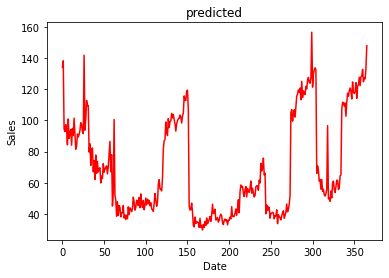

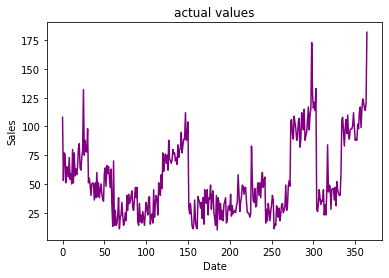

In [94]:
plt.plot(result,color='red')
plt.title('predicted')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()
plt.plot(test_sales,color='purple')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title('actual values')
plt.show()

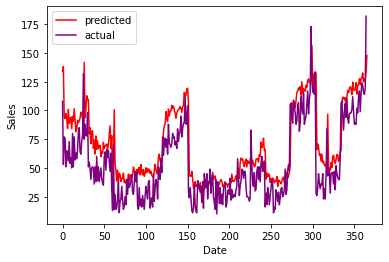

In [95]:
plt.plot(result,color='red',label='predicted')
plt.plot(test_sales,color='purple',label="actual")
plt.xlabel("Date")
plt.ylabel("Sales")
leg = plt.legend()
plt.show()